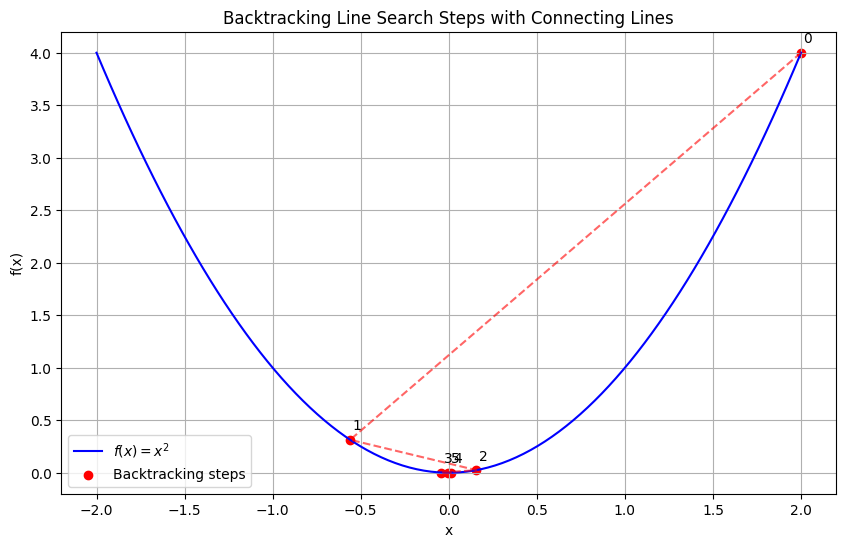

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its gradient
def f(x):
    return x ** 2

def grad_f(x):
    return 2 * x

# Backtracking parameters
x0 = 2.0       # Starting point
t_init = 1.0   # Initial step size
alpha = 0.3    # Parameter for sufficient decrease condition
beta = 0.8     # Parameter for shrinking step size

# Storage for plotting
x_values = [x0]
f_values = [f(x0)]
step_sizes = [t_init]

# Perform backtracking line search for multiple steps
for _ in range(5):
    t = t_init
    x_prev = x_values[-1]
    
    # Check the backtracking condition
    while f(x_prev - t * grad_f(x_prev)) > f(x_prev) - alpha * t * grad_f(x_prev) ** 2:
        t *= beta  # Shrink step size
    
    # Update x_k based on the computed step size
    x_new = x_prev - t * grad_f(x_prev)
    x_values.append(x_new)
    f_values.append(f(x_new))
    step_sizes.append(t)

# Plot the function and the backtracking steps with connecting lines
x_range = np.linspace(-2, 2, 100)
plt.figure(figsize=(10, 6))
plt.plot(x_range, f(x_range), label=r'$f(x) = x^2$', color='blue')
plt.scatter(x_values, f_values, color='red', label='Backtracking steps')
plt.plot(x_values, f_values, linestyle='--', color='red', alpha=0.6)  # Line connecting steps

# Annotate with staggered positions to avoid overlap
for i, (x, f_val, step) in enumerate(zip(x_values, f_values, step_sizes)):
    plt.annotate(f'{i}', (x, f_val), textcoords="offset points", xytext=(5,5), ha='center', va='bottom')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Backtracking Line Search Steps with Connecting Lines')
plt.legend()
plt.grid(True)
plt.show()
